In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipycanvas
import time
import math

# Physics Simulation


A physics engine is computer software that provides an approximate simulation of certain physical systems, such as rigid body dynamics (including collision detection), soft body dynamics, and fluid dynamics, of use in the domains of computer graphics, video games and film (CGI). Their main uses are in video games (typically as middleware), in which case the simulations are in real-time. The term is sometimes used more generally to describe any software system for simulating physical phenomena


## 1. Introduction

Through this notebook we will describe and simulate things that naturally occurs in our physical world. In this notebook "the world" is 2D canvas.

## 2. Position and Displacement vector

To simulate any physical phenomenon first we must be able to describe its position. Where the object is at any particular time. The position of the object could be described as a vector relative to the origin of a coordinate system $ \vec{r} $


$$ \vec{r} = \begin{pmatrix} x \\ y \end{pmatrix} = x\hat{i} + y\hat{j} $$

In [3]:
def plot_vectors(vectors, colors):
    """
    Plots vectors on the xy-plane. The `vectors` parameter is a Python list.
    Each vector is specified in the format [start_x, start_y, end_x, end_y]
    """
    vectors = np.array(vectors)
    x_start = vectors[:, 0]
    y_start = vectors[:, 1]

    x_end = vectors[:, 2]
    y_end = vectors[:, 3]
    
    u = x_end - x_start
    v = y_end - y_start
    
    xlim_min = np.min(np.minimum(x_start, x_end))
    xlim_max = np.max(np.maximum(x_start, x_end))
    ylim_min = np.min(np.minimum(y_start, y_end))
    ylim_max = np.max(np.maximum(y_start, y_end))


    plt.scatter(x_end, y_end, color=colors)
    
    plt.xlim(xlim_min - 0.5, xlim_max + 0.5)
    plt.ylim(ylim_min - 0.5, ylim_max + 0.5)

    ax = plt.gca()
    plt.quiver(x_start, y_start, u, v, angles = "xy", scale_units = "xy", scale = 1, color=colors)
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_aspect("equal")

    plt.show()

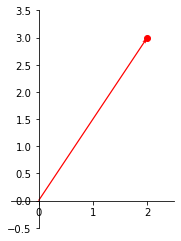

In [4]:
plot_vectors([[0, 0, 2, 3]] ,["red"])

If an object moves to some position relative to its original position then object position changes. This change is called displacement.


$$ \Delta\vec{r} = \vec{r_{n+1}} - \vec{r_n} $$


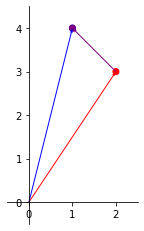

In [5]:
r1 = np.array([2, 3])
r2 = np.array([1, 4])
dr = r2 - r1

r1 = [0, 0, 2, 3]
r2 = [0, 0, 1, 4]
dr = [2, 3, 1, 4]

plot_vectors([r1, r2, dr], ["red", "blue", "purple"])

red point is the initial position, blue point is the new position , purple vector is the displacement vector

Objects in motion can also have series of displacements. The total displacements is sum of individual displacements

$$  \Delta\vec{s_{total}} = \sum_{i = 0}^{n} \Delta\vec{r_i}  $$

The total distance traveled is the sum of the magnitudes of all displacement vectors

$$ s_{total} = \sum_{i = 0}^{n} \left | \Delta\vec{r_i}  \right | $$

## 3. Velocity

Motion is the phenomenon in which an object changes its position overtime. Velocity $ \vec{v} $ is a vector quantity that measures displacement $ {\Delta}\vec{s} $  over the change in time $ {\Delta}t $. In other words velocity is rate of change of position over time.


$$ \vec{v} = \frac{{\Delta}\vec{s}}{{\Delta}t} = \frac{ {\Delta}\vec{s_{n+1}} - {\Delta}\vec{s_{n}} }{t_{n+1} - t_{n}} $$


In [6]:
t = np.arange(0, 10, 1)
x = np.arange(0, 10, 1)
y = x

s = np.array([(x_i, y_i) for x_i, y_i in zip(x, y)])

v_01 = (s[1] - s[0]) / (t[1] - t[0])
v_average = np.add.reduce([ (s[i+1] - s[i]) / (t[i+1] - t[i]) for i in range(len(s)-1)])/(t[9] - t[0])
print(f"Velocity between s[1] and s[0]: {v_01}")
print(f"Average veloctity: {v_average}")

Velocity between s[1] and s[0]: [1. 1.]
Average veloctity: [1. 1.]


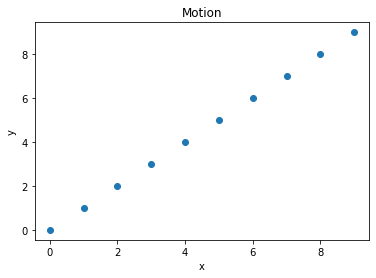

In [7]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Motion")
plt.show()

From above, it is clear that velocity is:

$$ \vec{v} = \begin{pmatrix} 1 \\ 1 \end{pmatrix} $$

which means between two points, object moves 1 right and 1 up 

We can describe motion as a function:

$$ \vec{s}(t) = \vec{s_{0}} + \vec{v}t $$


To find velocity at any position(instantaneous velocity) we let $ t_{1} = t $ and $ t_{2} = t + {\Delta}t $. After inserting these expressions in the equation for velocity and get the limit as $ {\Delta}t \rightarrow 0$. We find the expression for the instantaneous velocity:

$$ \vec{v}(t) = \lim_{{\Delta}t \rightarrow 0}{\frac{\vec{s}(t + {\Delta}t) - \vec{s}(t)}{{\Delta}t}} = \frac{d\vec{s}(t)}{dt} $$
    

## 4. Acceleration

Acceleration is rate of change of velocity over time. 

$$ \vec{a} = \frac{{\Delta}\vec{v}}{{\Delta}t} = \frac{ {\Delta}\vec{v_{n+1}} - {\Delta}\vec{v_{n}} }{t_{n+1} - t_{n}} $$

We can describe the velocity as a function:

$$ \vec{v}(t) = \vec{v_{0}} + \vec{a}t $$

To find acceleration at any position(instantaneous acceleration) we let $ t_{1} = t $ and $ t_{2} = t + {\Delta}t $. After inserting these expressions in the equation for acceleration and get the limit as $ {\Delta}t \rightarrow 0$. We find the expression for the instantaneous acceleration:

$$ \vec{a}(t) = \lim_{{\Delta}t \rightarrow 0}{\frac{\vec{v}(t + {\Delta}t) - \vec{v}(t)}{{\Delta}t}} = \frac{d\vec{v}(t)}{dt} $$

## 5. Simulator with ipycanvas

### 5.1 ipycanvas coordinate system

As opposite to matplotlib, where its origin is located at bottom left corner, in the coordinate system defined by [ipycanvas](https://ipycanvas.readthedocs.io/en/latest/index.html), origin is located at top left corner. All elements are placed relative to this origin. For example top left corner of the blue square is located x pixels from the left and y pixels from the top at coordinates (x, y)

![coordinate system](https://ipycanvas.readthedocs.io/en/latest/_images/grid.png)

### 5.2 Vector

In [8]:
class Vector2D:
    def __init__(self, x, y):
        """
            two dimensional vector
        """
        self.x = x
        self.y = y
        self.mag = math.sqrt(self.x**2 + self.y**2)

    def normalize(self):
        return self / self.mag
        
    def limit(self, maxm):
        if self.mag > maxm:
            multiplier = maxm/self.mag
        else:
            multiplier = 1.0
            
        return self * multiplier
        
    def __add__(self, other):
        """ Vector addition """
        return Vector2D(self.x + other.x, self.y + other.y)  
    
    def __mul__(self, scalar):
        """ Vector scalar multiplication """ 
        return Vector2D(self.x * scalar, self.y * scalar)
    
    def __truediv__(self, scalar):
        return Vector2D(self.x / scalar, self.y / scalar)
    
    def __sub__(self, other):
        """ Vector subtraction"""
        return Vector2D(self.x - other.x, self.y - other.y)
    
    def __gt__(self, other):
        return self.mag > other.mag
        
    def __str__(self):
        return f"({self.x}, {self.y})"

### 5.3 Object2D

In [19]:
class Object2D:
    def __init__(self, position):
        """
            Object which is controled by the simulation
            possition - 2D vector describing displacement from 0,0
        """
        self.position = position
        self.forces = []

    def draw(self, canvas):
        """
            draw object on the canvas
        """
        raise NotImplemented()

    def update(self, canvas):
        """
            update the object
        """
        raise NotImplemented()

### 5.4 Simulation

In [21]:
class Simulation:
    def __init__(self, width=200, height=200):
        self.width = width
        self.height = height
        self.multi_canvas = ipycanvas.MultiCanvas(2, width=self.width, height=self.height)
        
        self.background_canvas = self.multi_canvas[1]
        self.background_canvas.stroke_style = "black"
        self.background_canvas.stroke_rect(0, 0, self.width, self.height)
        
        self.canvas = self.multi_canvas[0]
        
        display(self.multi_canvas)
        self.objects = []
        self.fps = 60
        self.frameDelay = 1 / self.fps;
        
    def addObject(self, object2D):
        """
            Add Object2D to the simulation
        """
        self.objects.append(object2D)

    def draw(self):
        """
            Draw every Object2D to the canvas
        """
        for obj in self.objects:
            obj.draw(self.canvas)

    def update(self):
        """
            phisics update every Object2D
        """
        for obj in self.objects:
            obj.update(self.canvas)

    def run(self, period):
        """
            period - simulation time in seconds 
            Run Simation:
                1. Update
                2. Draw
        """
        simulationStart = time.time()
        deltaTime = 0

        while True:
            
            frameStart = time.time()
            self.update()

            with ipycanvas.hold_canvas(self.multi_canvas):
                self.canvas.clear()
                self.draw()
                
            frameEnd = time.time()
            
            if((frameEnd - simulationStart) > period):
                break
            
            deltaTime = frameEnd - frameStart
            
            #cap FPS
            if deltaTime < self.frameDelay:
                time.sleep(self.frameDelay - deltaTime)

In [156]:
class Rectangle(Object2D):
    def __init__(self, position, width, height, velocity=Vector2D(0, 0), accelaration=Vector2D(0, 0)):
        super().__init__(position)
        self.velocity = velocity
        self.accelaration = accelaration
        self.max_speed = 4
        self.width = width
        self.height = height

    def checkEdges(self, canvas):
        if self.position.x > canvas.width:
            self.position.x = 0

        elif self.position.x < 0:
            self.position.x = canvas.width

        if self.position.y > canvas.height:
            self.position.y = 0
        elif self.position.y < 0:
            self.position.y = canvas.height

    def update(self, canvas):
        self.velocity += self.accelaration
        self.velocity = self.velocity.limit(self.max_speed)
        self.position += self.velocity

        self.checkEdges(canvas)

    def draw(self, canvas):
        canvas.fill_rect(self.position.x,
                         self.position.y, self.width, self.height)


In [157]:
sim = Simulation(500, 100)
rect = Rectangle(position=Vector2D(50, 50),
                 width=20, height=20,
                 velocity=Vector2D(0, 0), 
                 accelaration=Vector2D(0.01, 0.01))
sim.addObject(rect)
sim.run(5)

MultiCanvas(height=100, width=500)

In [13]:
class Static(Rectangle):
    def __init__(self, position, width, height):
        super().__init__(position, width, height)
        self.width = width
        self.height = height

    def update(self, canvas):
        pass


class Follower(Rectangle):
    def __init__(self, position, width, height,  goto):
        super().__init__(position, width, height)
        self.width = width
        self.height = height
        self.goto = goto
        self.a_factor = 0.1

    def update(self, canvas):
        direction = (self.goto - self.position).normalize()

        self.accelaration = direction * self.a_factor
        super().update(canvas)

    def draw(self, canvas):

        canvas.global_alpha = 0.1
        super().draw(canvas)
        canvas.global_alpha = 1
        canvas.stroke_style = "black"
        canvas.stroke_rect(self.position.x,
                           self.position.y, self.width, self.height)

In [14]:
sim = Simulation(500, 200)

static = Static(position=Vector2D(240, 90),
               width=10, height=10)

n = 1
for f_i in range(10):
    n *= -1 
    sim.addObject(Follower(position=Vector2D( ( 5 + (f_i * 20)) , n*30 + (f_i * 10)), width=10, height=10, goto=static.position))
    
sim.addObject(static)

sim.run(5)

MultiCanvas(height=200, width=500)

## 5. Forces. Newton's laws of motion

A force is a vector that causes an object with mass to accelerate. It is mathematical tool that is introduced in Newton’s theory of physics.

### 5.1 Newton’s First Law

The first law states that an object at rest will stay at rest, and an object in motion will stay in motion unless acted on by a net external force. Mathematically, this is equivalent to saying that if the net force on an object is zero, then the velocity of the object is constant.


$$ \sum{\vec{F}} = 0 \Leftrightarrow \frac{d\vec{v}(t)}{dt} = 0  $$

### 5.2 Newton's Second Law

The second law states that the rate of change of momentum of a body over time is directly proportional to the force applied, and occurs in the same direction as the applied force. For objects with constant mass:


$$ \sum{\vec{F}} = \frac{d(m{\vec{v}}(t))}{dt} = m\frac{d{\vec{v}}(t)}{dt} = m\vec{a} $$

### 5.3 Newton's Third Law

The third law states that all forces between two objects exist in equal magnitude and opposite direction: if one object $ A $ exerts a force $\vec{F_A}$ on a second object $ B $, then $ B $ simultaneously exerts a force $ \vec{F_B} $ on $ A $, and the two forces are equal in magnitude and opposite in direction: 

$$ \vec{F_A} = -\vec{F_B} $$

In [144]:
class NewtonCircle(Object2D):
    def __init__(self, position, radius, mass):
        super().__init__(position)
        self.radius = radius
        self.mass = mass
        self.velocity = Vector2D(0, 0)
        self.acceleration = Vector2D(0, 0)
        self.forces = []
    
    def copy(self):
        return NewtonCircle(self.position, self.radius, self.mass)
    
    def bounce(self, canvas):
        if self.position.x+self.radius > canvas.width:
            self.position.x = canvas.width - self.radius
            self.velocity.x *= -1
            
        elif self.position.x < 0:
            self.position.x = 0
            self.velocity.x *= -1
            
            
        if self.position.y+self.radius > canvas.height:
            self.position.y = canvas.height - self.radius
            self.velocity.y *= -1
            
        elif self.position.y < 0:
            self.position.y = 0
            self.velocity.y *= -1
    
    def addForce(self, force):
        self.forces.append(force)
    
    def draw(self, canvas):
        canvas.stroke_style = "black"
        canvas.stroke_circle(self.position.x, self.position.y, self.radius)
        
        canvas.global_alpha = 0.3
        canvas.fill_circle(self.position.x, self.position.y, self.radius)
        canvas.global_alpha = 1
        
    def applyForces(self):
        for force in self.forces:
            self.acceleration += (force / self.mass)
            
    def update(self, canvas):
        
        self.applyForces()
        self.velocity += self.acceleration
        
        self.velocity.limit(5)
        
        self.position += self.velocity
        self.bounce(canvas)
        self.acceleration *= 0 

In [145]:
sim = Simulation(500, 200)

circle = NewtonCircle(position=Vector2D(240, 90),
                      radius=10,
                      mass=1)

circle1 = circle.copy()
circle1.velocity = Vector2D(0, 1)

sim.addObject(circle)
sim.addObject(circle1)
sim.run(1)

MultiCanvas(height=200, width=500)

Newton's first law. Objects do not change their states without forces.

In [155]:
sim = Simulation(500, 200)


f1 = Vector2D(0.1, 0);
f2 = Vector2D(0, 0.5);

circle = NewtonCircle(position=Vector2D(240, 90),
                      radius=10,
                      mass=5)

circle1 = NewtonCircle(position=Vector2D(240, 90),
                      radius=20,
                      mass=10)

circle.addForce(f1)
circle.addForce(f2)

circle1.addForce(f1)
circle1.addForce(f2)

sim.addObject(circle)
sim.addObject(circle1)

sim.run(10)

MultiCanvas(height=200, width=500)

Newton's second law. Forces are proportional to the mass

In [154]:
sim = Simulation(500, 200)


f1 = Vector2D(0.1, 0);

circle = NewtonCircle(position=Vector2D(240, 90),
                      radius=10,
                      mass=10)

circle.addForce(f1)
circle.addForce(f1*-1)

sim.addObject(circle)

sim.run(1)

MultiCanvas(height=200, width=500)

Newton's third law. Forces are canceled out.

## 6. Collision detection

Collision detection is the computational problem of detecting the intersection of two or more objects.
Algorithms to detect collision in 2D world depend on the type of shapes that can collide (e.g. Rectangle to Rectangle, Rectangle to Circle, Circle to Circle).

### 1.  Axis-Aligned Bounding Box (AABB)

Axis-Aligned Bounding Box collision detection, or AABB for short, is one of the simplest forms of collision detection. The Bounding Box part of the name just refers to a rectangular structure that defines the surface area of an object. Axis-Aligned means that the bounding boxes of the objects being compared for collision are aligned on both their x and y axes.


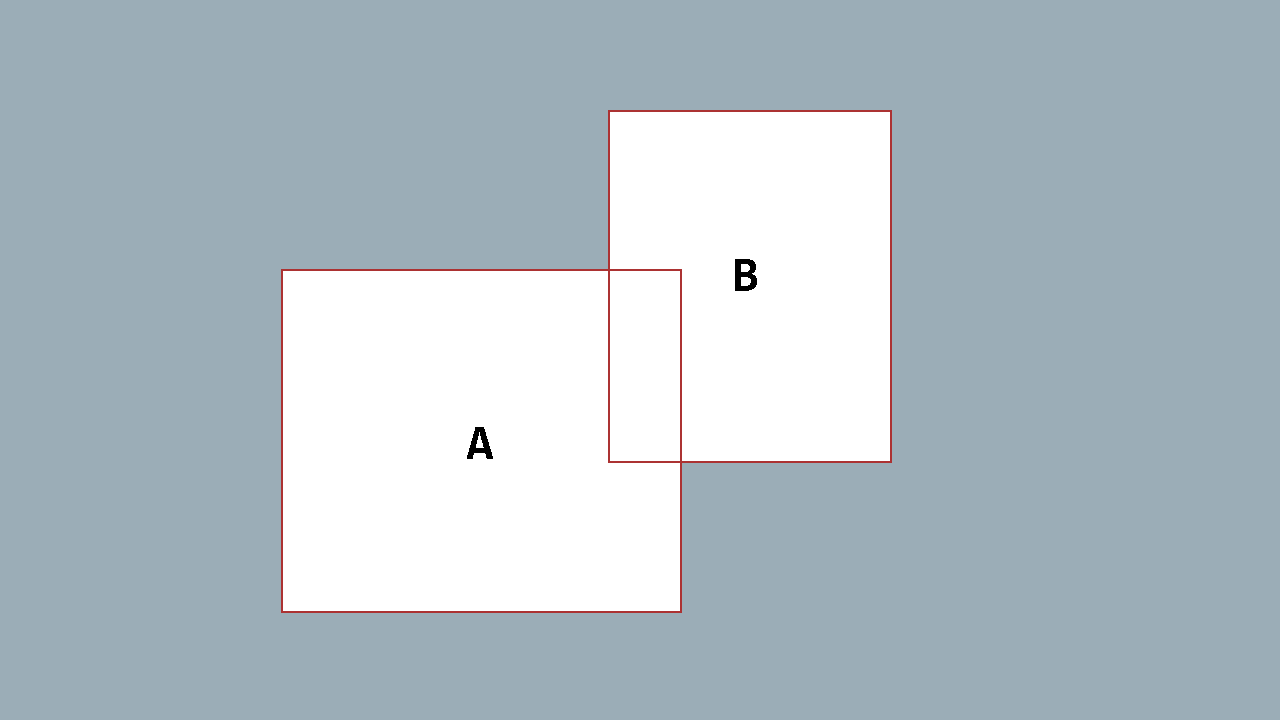


The x and y axes of both boxes are aligned, which means we can use AABB collision detection to check for collision between them.

In [147]:
class RectCollider(Object2D):
    def __init__(self, position, width, height, mass=1):
        super().__init__(position)
        self.width = width
        self.height = height
        self.others = []
        self.velocity = Vector2D(0, 0)
        self.max_speed = 3
        self.mass = mass
        self.fill_style = "black"
        
    def addObject(self, other):
        self.others.append(other)

    def checkCollision(self):
        """
            AABB
        """
        for other in self.others:
            if self.position.x < (other.position.x + other.width) \
                and (self.position.x + self.width) > other.position.x \
                and self.position.y < (other.position.y + other.height) \
                    and self.position.y + self.height > other.position.y:
                    self.fill_style = "red"
                    return True
                    
            else:
                self.fill_style = "black"
                return False
                
                        

    def bounce(self, canvas):
        if self.position.x+self.width > canvas.width:
            self.position.x = canvas.width - self.width
            self.velocity.x *= -1

        elif self.position.x < 0:
            self.position.x = 0
            self.velocity.x *= -1


    def update(self, canvas):
        self.velocity.limit(5)
        self.position += self.velocity
        self.bounce(canvas)
        self.checkCollision()

    def draw(self, canvas):
        canvas.stroke_style = "black"
        canvas.stroke_rect(self.position.x, self.position.y,
                           self.width, self.height)

        canvas.global_alpha = 0.3
        canvas.fill_style = self.fill_style
        canvas.fill_rect(self.position.x, self.position.y,
                         self.width, self.height)
        canvas.global_alpha = 1

In [153]:
sim = Simulation(500, 200)

v = Vector2D(3, 0)

obj1 = RectCollider( position=Vector2D(0, 75),
                     width = 50,
                     height = 50)
obj1.velocity = v
obj2 = RectCollider( position=Vector2D(450, 75),
                     width = 50,
                     height = 50)
obj2.velocity = v*-1

obj1.addObject(obj2) # cross ref, most probably mem leak
obj2.addObject(obj1)

sim.addObject(obj1)
sim.addObject(obj2)
sim.run(10)

MultiCanvas(height=200, width=500)

### Elastic collision


An elastic collision is an encounter between two bodies in which the total kinetic energy of the two bodies remains the same. In an ideal, perfectly elastic collision, there is no net conversion of kinetic energy into other forms such as heat, noise, or potential energy. 

In an elastic collision, both momentum and kinetic energy are conserved. Consider object 1 and 2 with masses $ m_1 , m_2 $, and velocities $ \vec{u_1}, \vec{u_2} $ before collision, $ \vec{u_1}, \vec{u_2} $ after collision. 

The conservation of the total momentum before and after the collision is expressed by:

$$ m_1\vec{u_1} + m_2\vec{u_2} = m_1\vec{v_1} + m_1\vec{v_2} $$


Likewise, the conservation of the total kinetic energy is expressed by:

$$ \frac{1}{2}m_1\vec{u_1^2} + \frac{1}{2}m_2\vec{u_2^2} = \frac{1}{2}m_1\vec{v_1^2} + \frac{1}{2}m_2\vec{v_2^2} $$

These equations may be solved directly to find $\vec{v_1}, \vec{v_2}$ when $\vec{u_1}, \vec{u_2}$ are known:


$$ \vec{v_1} = \frac{m_1 - m_2}{m_1 + m_2}\vec{u_1} + \frac{2m_2}{m_1 + m_2}\vec{u_2}$$

$$ \vec{v_2} = \frac{2m_1}{m_1 + m_2}\vec{u_1} + \frac{m_2 - m_1}{m_1 + m_2}\vec{u_2}$$



## Check:

- generalized coordinates
- Hamilton equations
- Fluid simulation
- Real-time fluid for Games

## 9. References

- https://en.wikipedia.org/wiki/Physics_engine
- https://en.wikipedia.org/wiki/Video_game_programming
- https://en.wikipedia.org/wiki/Motion
- https://en.wikipedia.org/wiki/Velocity
- https://en.wikipedia.org/wiki/Collision_detection
- https://en.wikipedia.org/wiki/Elastic_collision
- https://natureofcode.com/
- https://openstax.org/details/books/university-physics-volume-1
- https://gafferongames.com/post/fix_your_timestep/
- https://gafferongames.com/categories/game-physics/
- https://gafferongames.com/post/integration_basics/